In [5]:
# manufacturing_output_prediction.ipynb

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pickle
import json
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("viridis")
%matplotlib inline

print("All libraries imported successfully!")

All libraries imported successfully!


In [6]:
# Load the dataset
df = pd.read_csv('manufacturing_dataset_1000_samples.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (1000, 19)

First 5 rows:


,Timestamp,Injection_Temperature,Injection_Pressure,Cycle_Time,Cooling_Time,Material_Viscosity,Ambient_Temperature,Machine_Age,Operator_Experience,Maintenance_Hours,Shift,Machine_Type,Material_Grade,Day_of_Week,Temperature_Pressure_Ratio,Total_Cycle_Time,Efficiency_Score,Machine_Utilization,Parts_Per_Hour
0,01-01-2023 00:00,221.0,136.0,28.7,13.6,375.5,28.0,3.8,11.2,64,Evening,Type_B,Economy,Thursday,1.625,42.3,0.063,0.510,36.5
1,01-01-2023 01:00,213.3,128.9,34.5,14.0,215.8,22.6,6.8,6.3,58,Night,Type_A,Standard,Wednesday,1.655,48.5,0.037,0.389,29.9
2,01-01-2023 02:00,222.8,115.9,19.9,9.5,307.0,25.3,4.2,9.6,47,Day,Type_A,Standard,Monday,1.922,29.4,0.061,0.551,56.9
3,01-01-2023 03:00,233.3,105.3,39.2,13.1,137.8,26.0,9.2,8.6,49,Evening,Type_A,Premium,Saturday,2.215,52.3,0.054,0.293,31.0
4,01-01-2023 04:00,212.2,125.5,45.0,9.9,298.2,23.6,6.2,23.0,49,Night,Type_B,Premium,Monday,1.691,54.9,0.145,0.443,15.0


In [7]:
# Display dataset information
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Timestamp                   1000 non-null   object 
 1   Injection_Temperature       1000 non-null   float64
 2   Injection_Pressure          1000 non-null   float64
 3   Cycle_Time                  1000 non-null   float64
 4   Cooling_Time                1000 non-null   float64
 5   Material_Viscosity          980 non-null    float64
 6   Ambient_Temperature         980 non-null    float64
 7   Machine_Age                 1000 non-null   float64
 8   Operator_Experience         980 non-null    float64
 9   Maintenance_Hours           1000 non-null   int64  
 10  Shift                       1000 non-null   object 
 11  Machine_Type                1000 non-null   object 
 12  Material_Grade              1000 non-null   object 
 13  Day_of_Week         

In [8]:
# Display basic statistics
print("Descriptive Statistics:")
df.describe()

Descriptive Statistics:


,Injection_Temperature,Injection_Pressure,Cycle_Time,Cooling_Time,Material_Viscosity,Ambient_Temperature,Machine_Age,Operator_Experience,Maintenance_Hours,Temperature_Pressure_Ratio,Total_Cycle_Time,Efficiency_Score,Machine_Utilization,Parts_Per_Hour
count,1000.000000,1000.000000,1000.00000,1000.00000,980.000000,980.000000,1000.000000,980.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,215.315900,116.075000,35.85170,11.92320,251.630714,22.941224,7.855900,30.795204,50.580000,1.885852,47.737000,0.192688,0.356844,29.298100
std,11.995507,14.667246,8.35349,2.30429,73.348695,2.773712,3.900798,27.684769,16.014558,0.274323,8.671153,0.173839,0.195610,11.955497
min,180.000000,80.000000,16.30000,8.00000,104.600000,18.000000,1.000000,1.000000,26.000000,1.286000,24.600000,0.006000,0.001000,5.000000
25%,207.200000,105.900000,28.80000,10.27500,200.900000,20.800000,4.700000,9.800000,45.000000,1.683750,41.000000,0.061000,0.193000,17.500000
50%,215.300000,115.950000,36.85000,11.90000,242.700000,22.900000,7.900000,22.100000,50.000000,1.849500,48.550000,0.139000,0.355500,28.200000
75%,222.800000,125.925000,45.00000,13.50000,295.300000,25.100000,11.100000,43.425000,55.000000,2.044250,55.300000,0.274000,0.520000,38.000000
max,300.000000,150.000000,60.00000,19.90000,1000.000000,28.000000,15.000000,120.000000,500.000000,2.843000,64.900000,0.840000,0.755000,68.600000


In [9]:
# Check for missing values
print("Missing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Missing Values:
Material_Viscosity     20
Ambient_Temperature    20
Operator_Experience    20
dtype: int64


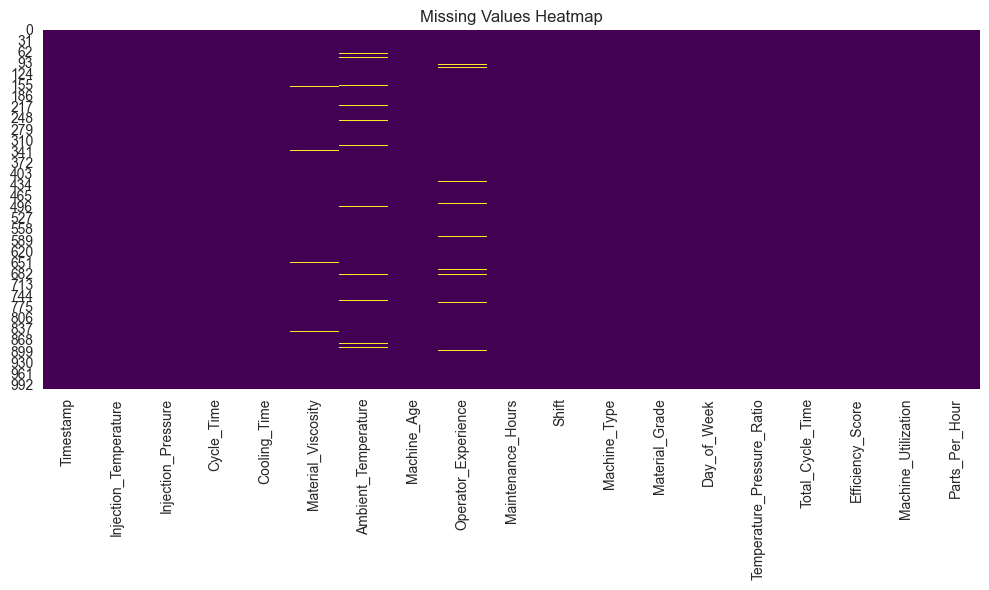

In [10]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.tight_layout()
plt.show()

In [11]:
# Check data types
print("Data Types:")
print(df.dtypes)

Data Types:
Timestamp                      object
Injection_Temperature         float64
Injection_Pressure            float64
Cycle_Time                    float64
Cooling_Time                  float64
Material_Viscosity            float64
Ambient_Temperature           float64
Machine_Age                   float64
Operator_Experience           float64
Maintenance_Hours               int64
Shift                          object
Machine_Type                   object
Material_Grade                 object
Day_of_Week                    object
Temperature_Pressure_Ratio    float64
Total_Cycle_Time              float64
Efficiency_Score              float64
Machine_Utilization           float64
Parts_Per_Hour                float64
dtype: object


In [12]:
# Check unique values for categorical columns
categorical_cols = ['Shift', 'Machine_Type', 'Material_Grade', 'Day_of_Week']
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

Shift: ['Evening' 'Night' 'Day']
Machine_Type: ['Type_B' 'Type_A' 'Type_C']
Material_Grade: ['Economy' 'Standard' 'Premium']
Day_of_Week: ['Thursday' 'Wednesday' 'Monday' 'Saturday' 'Friday' 'Sunday' 'Tuesday']


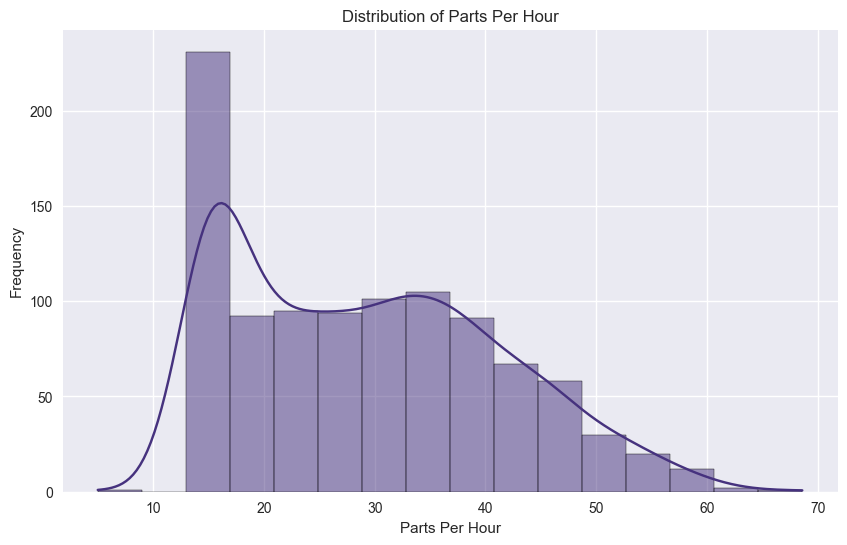

In [13]:
# Distribution of target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['Parts_Per_Hour'], kde=True)
plt.title('Distribution of Parts Per Hour')
plt.xlabel('Parts Per Hour')
plt.ylabel('Frequency')
plt.show()

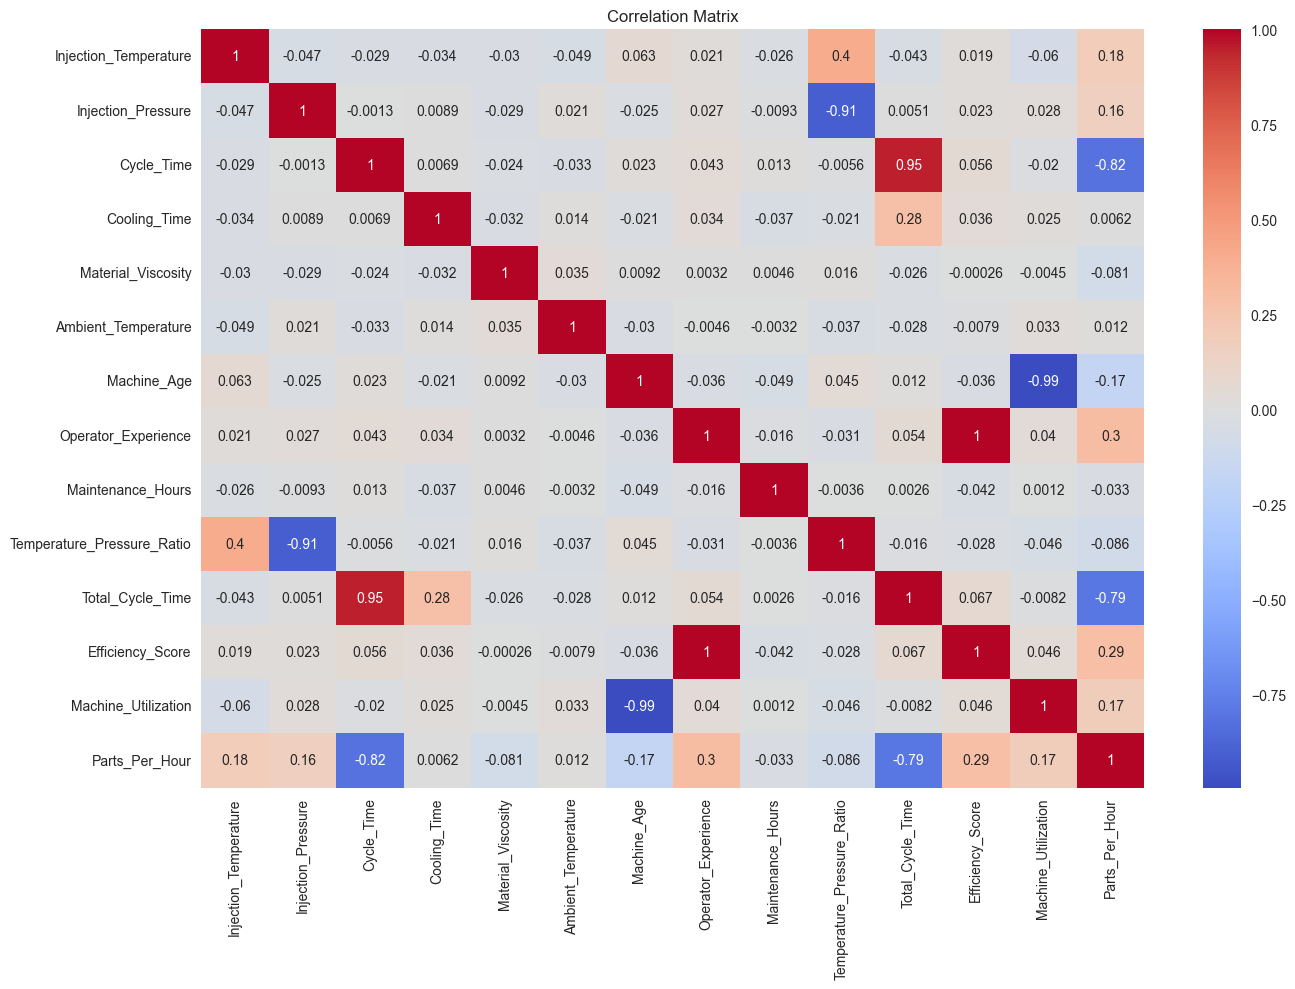

In [14]:
# Correlation matrix
plt.figure(figsize=(14, 10))
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

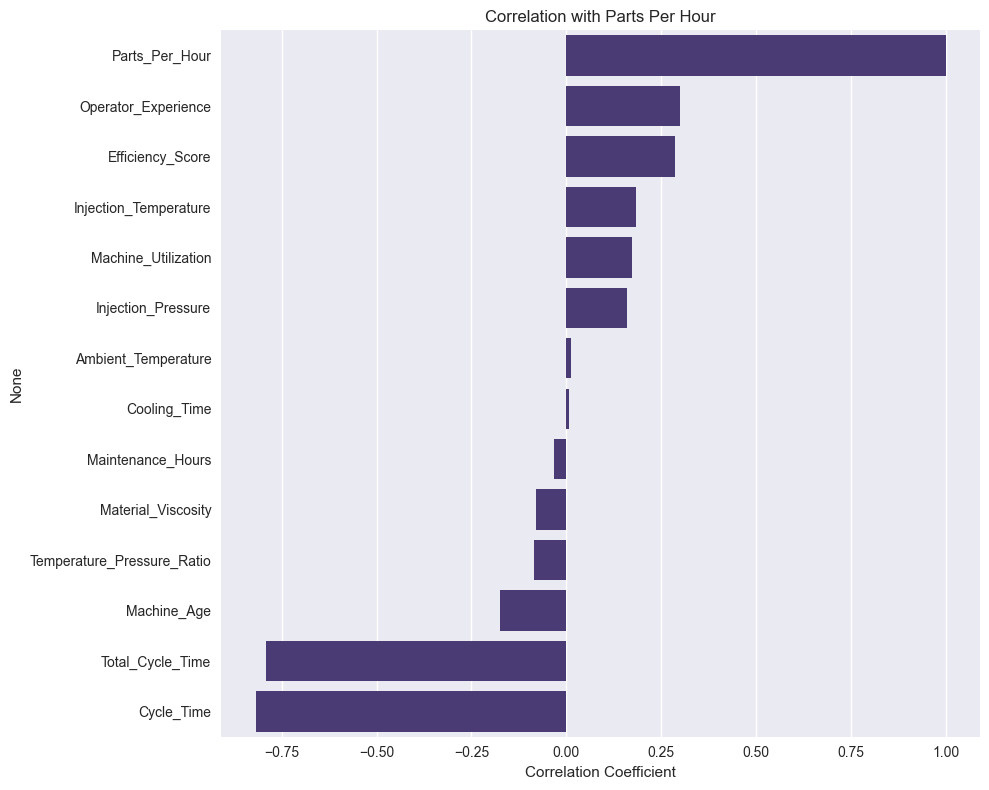

In [15]:
# Correlation with target variable
target_correlation = df[numeric_cols].corr()['Parts_Per_Hour'].sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x=target_correlation.values, y=target_correlation.index)
plt.title('Correlation with Parts Per Hour')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

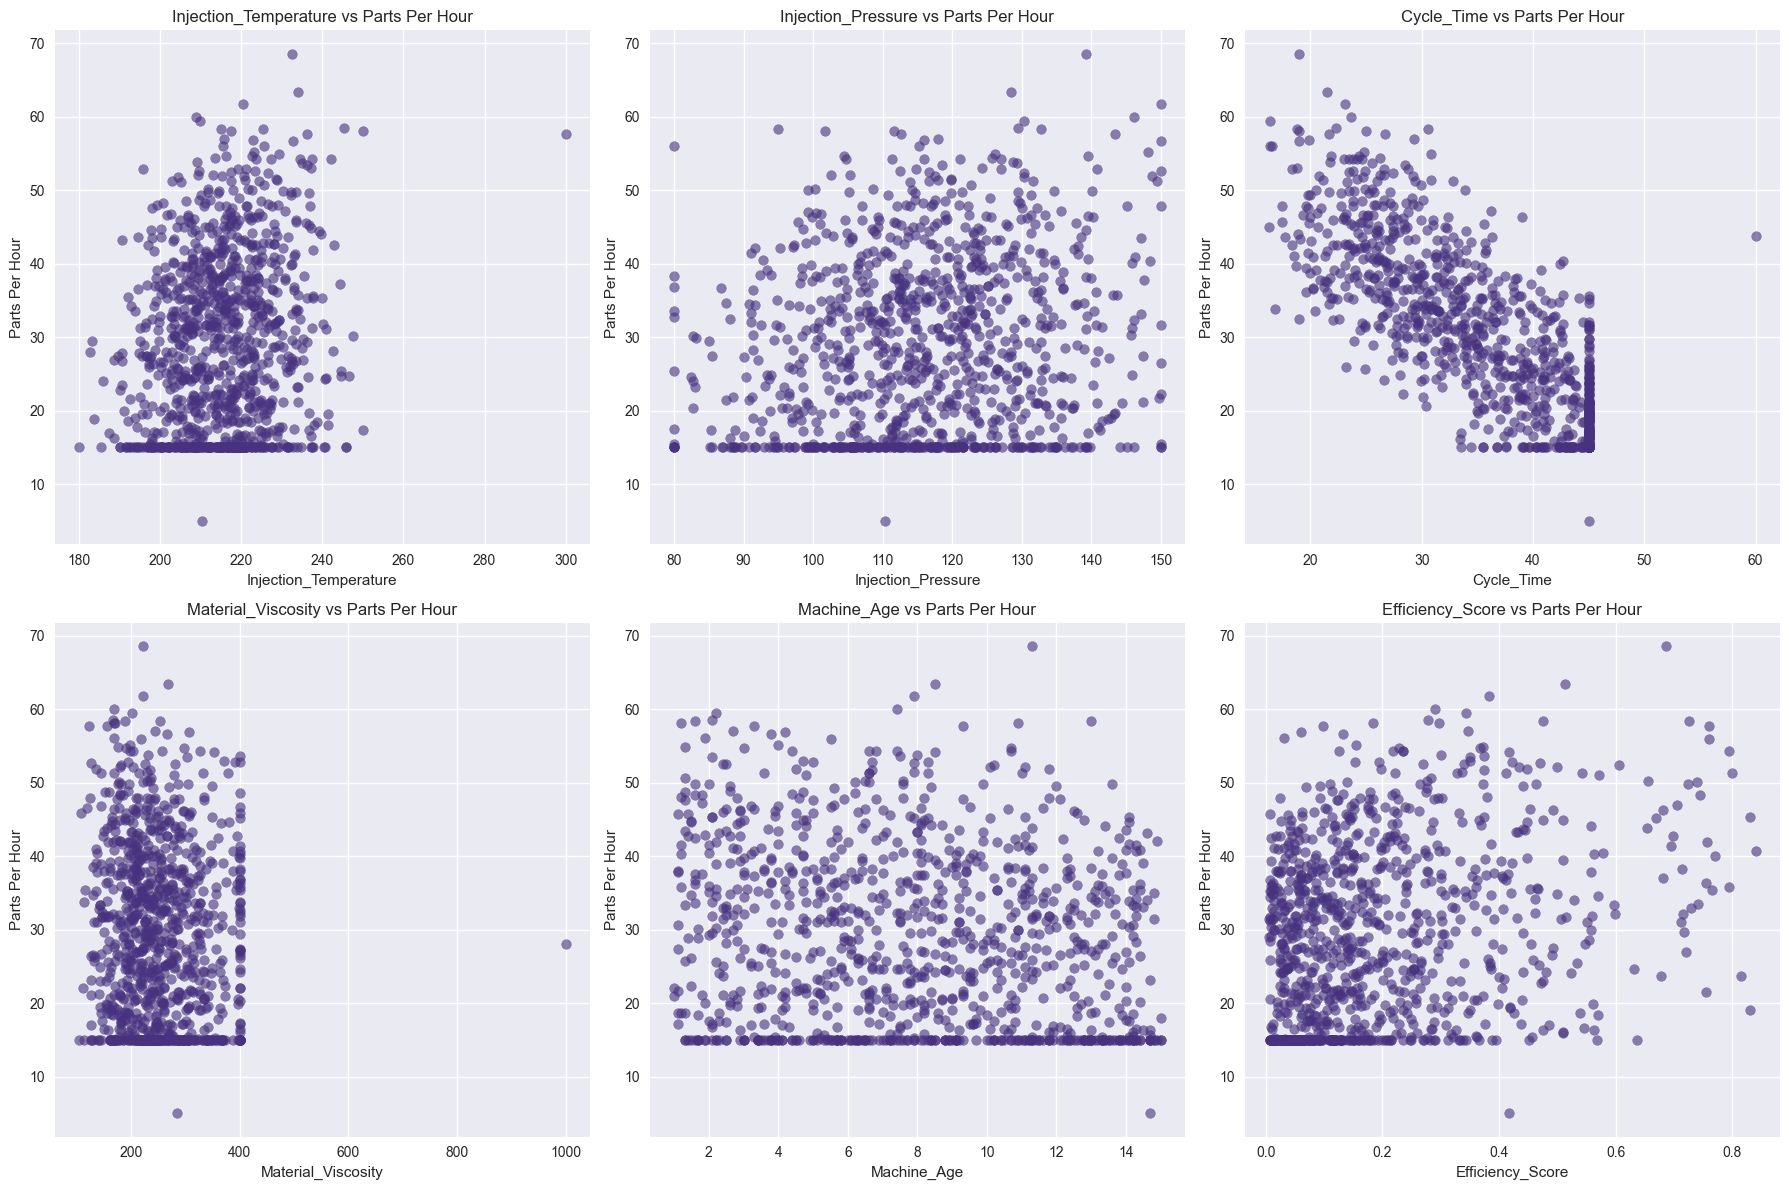

In [16]:
# Scatter plots of key features vs target
key_features = ['Injection_Temperature', 'Injection_Pressure', 'Cycle_Time', 
                'Material_Viscosity', 'Machine_Age', 'Efficiency_Score']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, feature in enumerate(key_features):
    axes[i].scatter(df[feature], df['Parts_Per_Hour'], alpha=0.6)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Parts Per Hour')
    axes[i].set_title(f'{feature} vs Parts Per Hour')

plt.tight_layout()
plt.show()

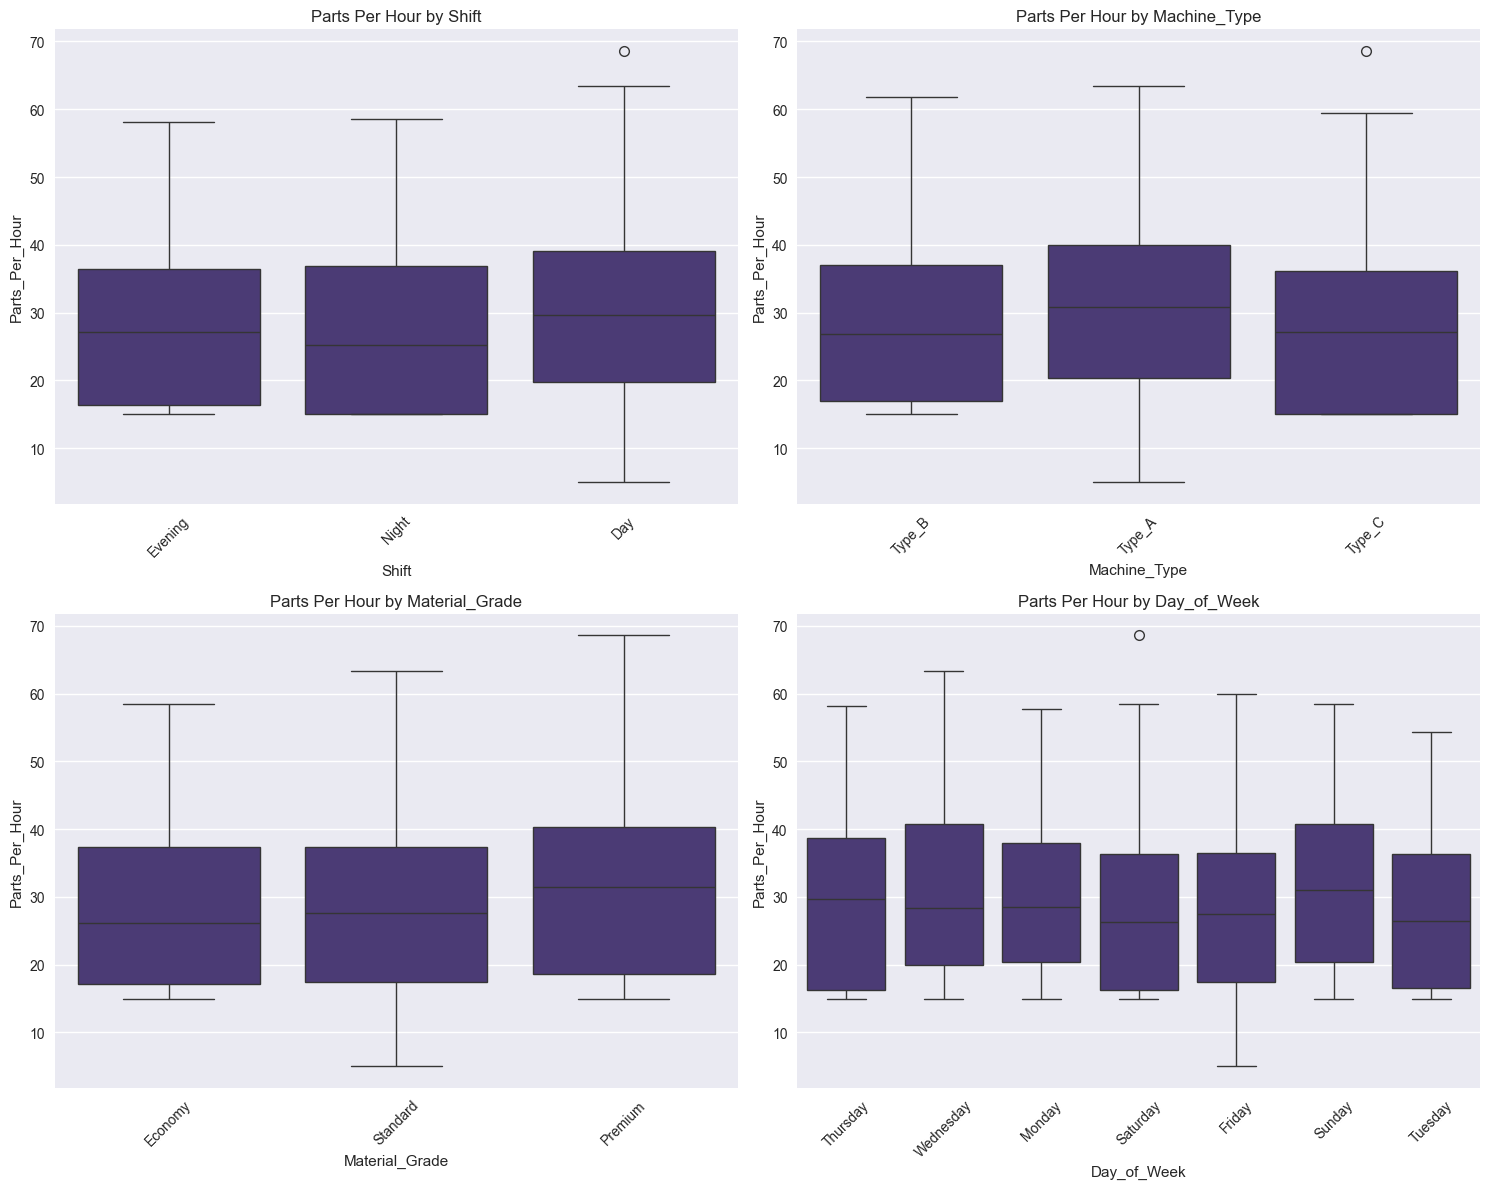

In [17]:
# Box plots for categorical variables
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
    sns.boxplot(x=df[col], y=df['Parts_Per_Hour'], ax=axes[i])
    axes[i].set_title(f'Parts Per Hour by {col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [18]:
# Extract time-based features from Timestamp
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y %H:%M')
df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month

# Drop the original Timestamp column
df.drop('Timestamp', axis=1, inplace=True)

# Define features and target
X = df.drop('Parts_Per_Hour', axis=1)
y = df['Parts_Per_Hour']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Training set: (800, 20), (800,)
Test set: (200, 20), (200,)


In [19]:
# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

print("Numerical columns:", list(numerical_cols))
print("Categorical columns:", list(categorical_cols))

Numerical columns: ['Injection_Temperature', 'Injection_Pressure', 'Cycle_Time', 'Cooling_Time', 'Material_Viscosity', 'Ambient_Temperature', 'Machine_Age', 'Operator_Experience', 'Maintenance_Hours', 'Temperature_Pressure_Ratio', 'Total_Cycle_Time', 'Efficiency_Score', 'Machine_Utilization']
Categorical columns: ['Shift', 'Machine_Type', 'Material_Grade', 'Day_of_Week']


In [20]:
# Create preprocessing pipelines
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create and fit the preprocessing pipeline
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f"Processed training set: {X_train_processed.shape}")
print(f"Processed test set: {X_test_processed.shape}")

Processed training set: (800, 29)
Processed test set: (200, 29)


In [21]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train_processed, y_train)

# Make predictions
y_pred = model.predict(X_test_processed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.4f}")

Model Evaluation Metrics:
Mean Squared Error (MSE): 12.30
Root Mean Squared Error (RMSE): 3.51
Mean Absolute Error (MAE): 2.72
R-squared (R²): 0.9057


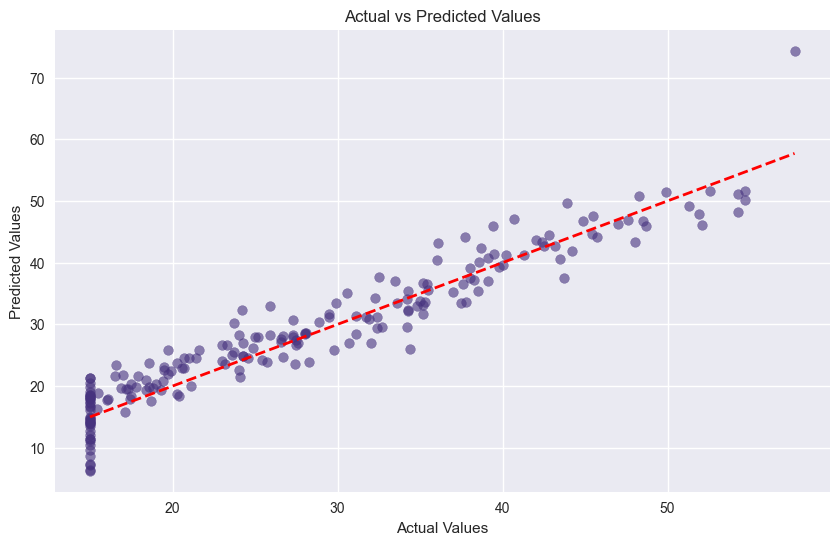

In [22]:
# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

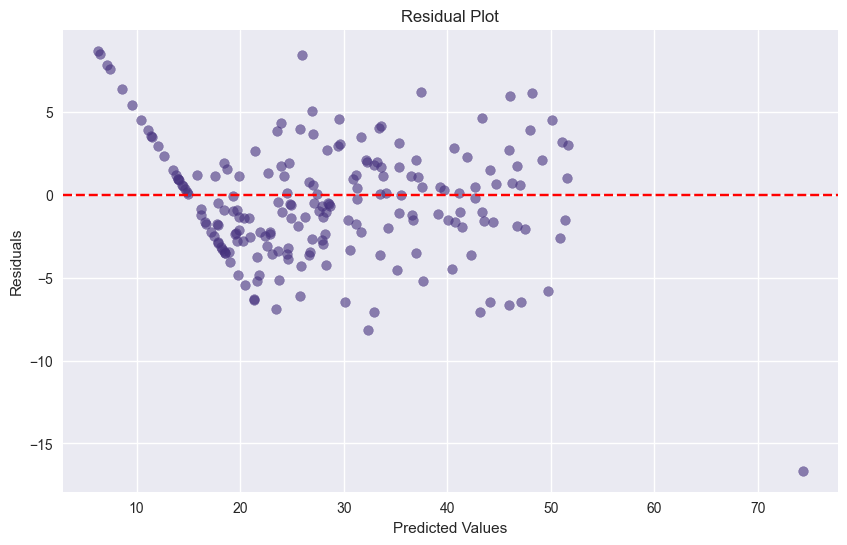

In [23]:
# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

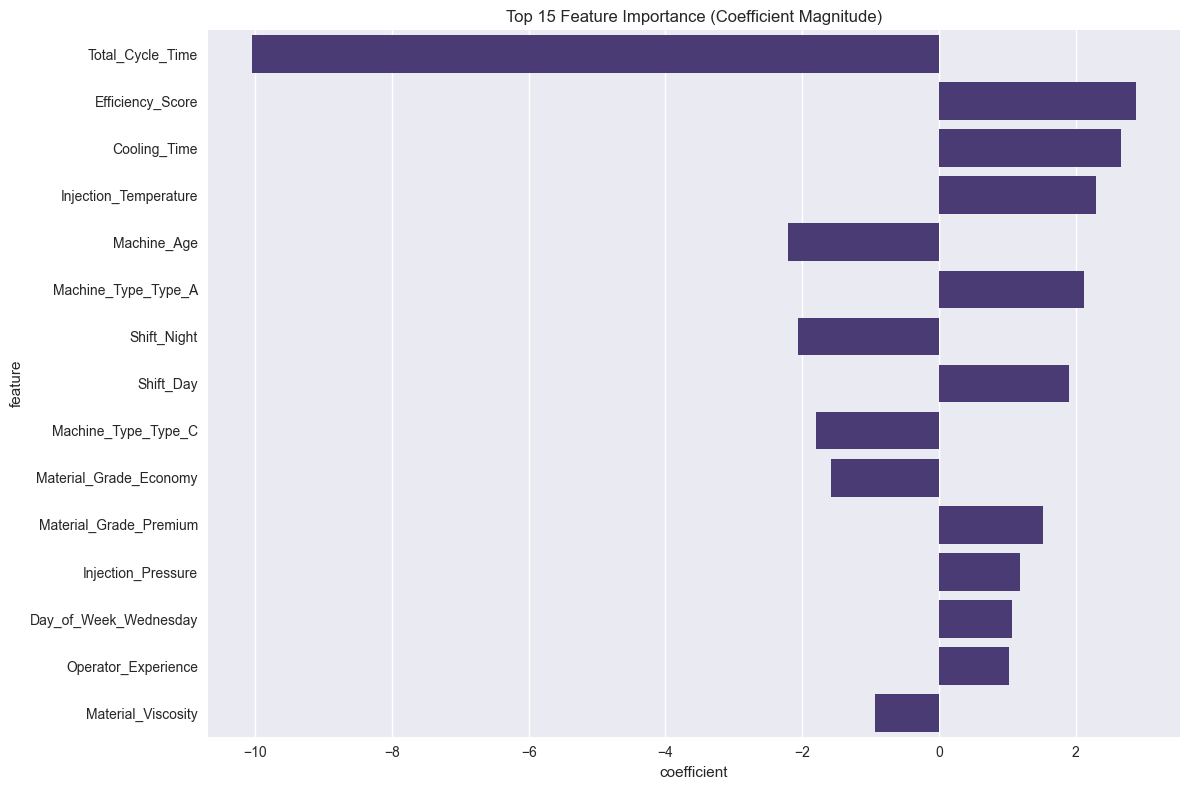

In [24]:
# Feature importance (coefficients)
feature_names = numerical_cols.tolist()
categorical_features = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols)
feature_names.extend(categorical_features)

coefficients = pd.DataFrame({
    'feature': feature_names,
    'coefficient': model.coef_
}).sort_values('coefficient', key=abs, ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='coefficient', y='feature', data=coefficients.head(15))
plt.title('Top 15 Feature Importance (Coefficient Magnitude)')
plt.tight_layout()
plt.show()

In [25]:
# Cross-validation (optional but good practice)
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X_train_processed, y_train, cv=5, scoring='r2')
print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean CV R²: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

Cross-validation R² scores: [0.92108257 0.9039087  0.81791586 0.92060564 0.92217948]
Mean CV R²: 0.8971 (+/- 0.0804)


In [26]:
# Create a comprehensive evaluation dataframe
eval_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred,
    'Residual': residuals
})

eval_df['Error_Percentage'] = (abs(eval_df['Residual']) / eval_df['Actual']) * 100

print("Prediction Error Statistics:")
print(f"Mean Absolute Percentage Error: {eval_df['Error_Percentage'].mean():.2f}%")
print(f"Median Absolute Percentage Error: {eval_df['Error_Percentage'].median():.2f}%")

Prediction Error Statistics:
Mean Absolute Percentage Error: 11.66%
Median Absolute Percentage Error: 7.99%


In [27]:
# Save the model and preprocessor
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)

print("Model and preprocessor saved successfully!")

Model and preprocessor saved successfully!


In [28]:
# Create a smaller version of the model for deployment (if needed)
# We'll create a dictionary with model metadata and save as JSON
model_info = {
    'model_type': 'LinearRegression',
    'training_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'performance_metrics': {
        'mse': float(mse),
        'rmse': float(rmse),
        'mae': float(mae),
        'r2': float(r2)
    },
    'feature_names': feature_names,
    'target_name': 'Parts_Per_Hour'
}

with open('model_info.json', 'w') as f:
    json.dump(model_info, f, indent=4)

print("Model metadata saved to model_info.json")

Model metadata saved to model_info.json


In [29]:
# Test loading the model
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

with open('preprocessor.pkl', 'rb') as f:
    loaded_preprocessor = pickle.load(f)

# Test prediction with loaded model
sample_data = X_test.iloc[0:1]
sample_processed = loaded_preprocessor.transform(sample_data)
sample_pred = loaded_model.predict(sample_processed)

print(f"Sample prediction: {sample_pred[0]:.2f}")
print(f"Actual value: {y_test.iloc[0]:.2f}")

Sample prediction: 19.90
Actual value: 18.60


In [30]:
# Create a function for making predictions (to be used in API)
def predict_output(input_data):
    """
    Predict parts per hour given input data
    """
    # Preprocess the input
    processed_data = preprocessor.transform(input_data)
    
    # Make prediction
    prediction = model.predict(processed_data)
    
    return prediction[0]

# Test the function
sample_input = X_test.iloc[0:1]
prediction = predict_output(sample_input)
print(f"Predicted output: {prediction:.2f}")
print(f"Actual output: {y_test.iloc[0]:.2f}")

Predicted output: 19.90
Actual output: 18.60


In [31]:
print("PROJECT SUMMARY")
print("=" * 50)
print(f"Target Variable: Parts_Per_Hour")
print(f"Dataset Size: {df.shape[0]} samples, {df.shape[1]} features")
print(f"Model: Linear Regression")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")
print(f"Key Features: {list(coefficients['feature'].head(5))}")
print("\nModel and preprocessor saved as:")
print("- model.pkl")
print("- preprocessor.pkl")
print("- model_info.json")

PROJECT SUMMARY
Target Variable: Parts_Per_Hour
Dataset Size: 1000 samples, 21 features
Model: Linear Regression
R² Score: 0.9057
RMSE: 3.51
Key Features: ['Total_Cycle_Time', 'Efficiency_Score', 'Cooling_Time', 'Injection_Temperature', 'Machine_Age']

Model and preprocessor saved as:
- model.pkl
- preprocessor.pkl
- model_info.json
